In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
from scipy import stats
from scipy.stats import linregress

In [3]:
athlete_bio_path = Path("data/Olympic_Athlete_Bio.csv")
athlete_event_results_path = Path("data/Olympic_Athlete_Event_Results.csv")
medal_tally_path = Path("data/Olympic_Games_Medal_Tally.csv")
olympic_results_path = Path("data/Olympic_Results.csv")
olympic_country_path = Path("data/Olympics_Country.csv")
olympic_games_path = Path("data/Olympics_Games.csv")

In [4]:
athlete_bio = pd.read_csv(athlete_bio_path)
athlete_event_results = pd.read_csv(athlete_event_results_path)
medal_tally = pd.read_csv(medal_tally_path)
olympic_results = pd.read_csv(olympic_results_path)
olympic_country = pd.read_csv(olympic_country_path)
olympic_games = pd.read_csv(olympic_games_path)

In [5]:
athlete_event_results[['year', 'season', 'olympics']] = athlete_event_results['edition'].str.split(' ', expand=True, n=2)

In [6]:
Exclude_year = ['1906']
error_year_df = athlete_event_results[~athlete_event_results['year'].str.contains('|'.join(Exclude_year), case=False)]

In [14]:
Exclude_strings = ['Winter', 'Intercalated', 'Equestrian']
summer_only_df = error_year_df[~error_year_df['season'].str.contains('|'.join(Exclude_strings), case=False)]
summer_only_df.drop(columns = ['edition', 'edition_id', 'result_id', 'pos','isTeamSport', 'olympics'], inplace=True)
summer_only_df

C:\Users\karen\AppData\Local\Temp\ipykernel_36636\2535109458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_only_df.drop(columns = ['edition', 'edition_id', 'result_id', 'pos','isTeamSport', 'olympics'], inplace=True)


,country_noc,sport,event,athlete,athlete_id,medal,year,season
0,ANZ,Athletics,"100 metres, Men",Ernest Hutcheon,64710,NaN,1908,Summer
1,ANZ,Athletics,"400 metres, Men",Henry Murray,64756,NaN,1908,Summer
2,ANZ,Athletics,"800 metres, Men",Harvey Sutton,64808,NaN,1908,Summer
3,ANZ,Athletics,"800 metres, Men",Guy Haskins,922519,NaN,1908,Summer
4,ANZ,Athletics,"800 metres, Men",Joseph Lynch,64735,NaN,1908,Summer
...,...,...,...,...,...,...,...,...
316416,USA,Wrestling,"Featherweight, Freestyle, Women",Jacarra Winchester,147307,NaN,2020,Summer
316417,USA,Wrestling,"Lightweight, Freestyle, Women",Helen Maroulis,132194,Bronze,2020,Summer
316418,USA,Wrestling,"Middleweight, Freestyle, Women",Kayla Miracle,147308,NaN,2020,Summer
316419,USA,Wrestling,"Light-Heavyweight, Freestyle, Women",Tamyra Mensah-Stock,147310,Gold,2020,Summer


In [15]:
first_olympics = summer_only_df.loc[(summer_only_df["year"]) == "1908"]
first_olympics["event"].nunique()

107

In [16]:
gold_first = first_olympics.loc[(first_olympics["medal"] == "Gold")]

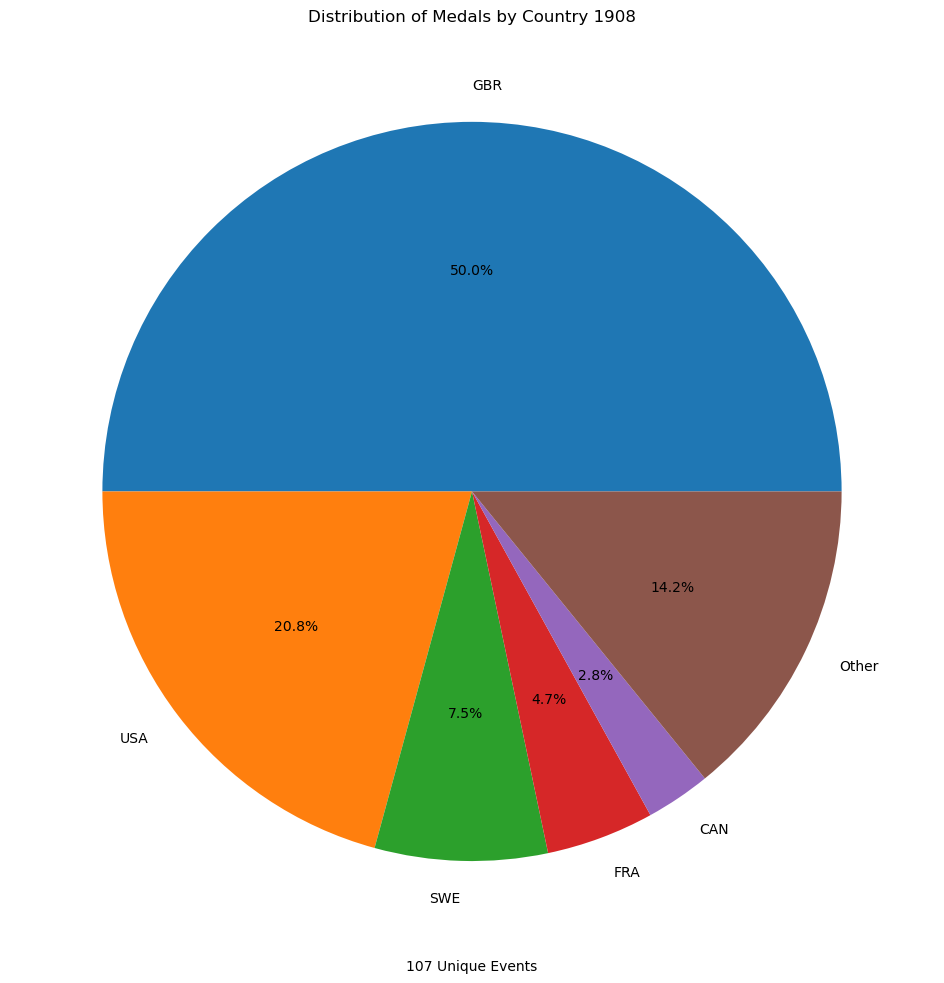

In [47]:
total_medals = gold_first[['event', 'country_noc']].drop_duplicates()["country_noc"].value_counts()
top_countries = total_medals.nlargest(5)
total_gold = total_medals.sum()
other_gold = total_gold - top_countries.sum()
other_series = pd.Series({"Other": other_gold})
final_data = pd.concat([top_countries, other_series])
plt.figure(figsize=(12, 12))
final_data.plot(kind='pie', color="blue", autopct="%1.1f%%")
plt.title("Distribution of Medals by Country 1908")
plt.xlabel("107 Unique Events")
plt.show()

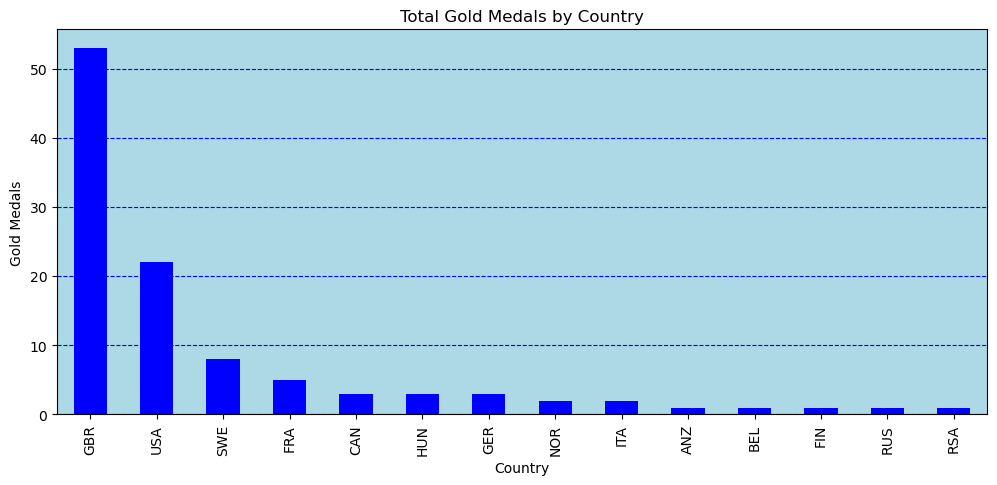

In [18]:
plt.figure(figsize=(12, 5))
total_medals.plot(kind='bar', color = "blue")
plt.xlabel("Country")
plt.ylabel("Gold Medals")
plt.title("Total Gold Medals by Country")
plt.grid(axis='y', linestyle='--', color = "blue")
plt.gca().set_facecolor('lightblue')

In [19]:
comparison_olympics = summer_only_df.loc[(summer_only_df["year"]) == "2020"]
comparison_olympics["event"].nunique()

290

In [20]:
gold_comparison = comparison_olympics.loc[(comparison_olympics["medal"] == "Gold")]


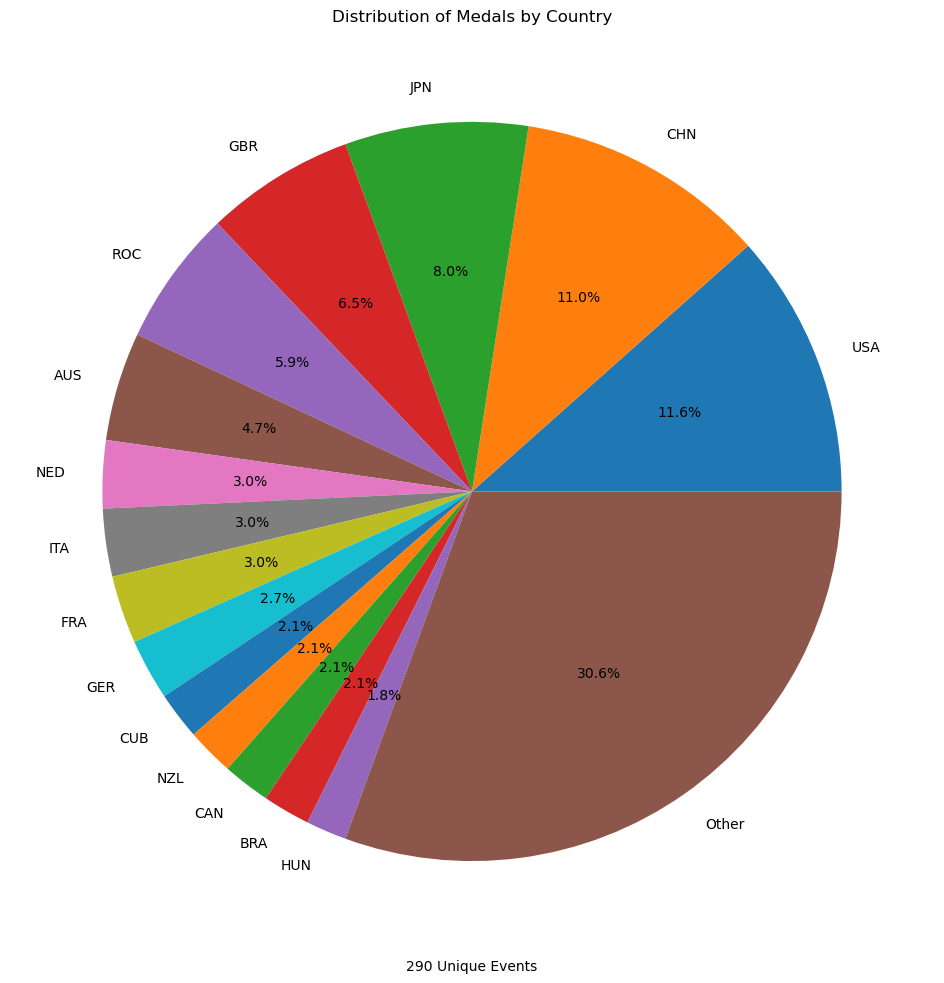

In [49]:
total_modern_medals = gold_comparison[['event', 'country_noc']].drop_duplicates()["country_noc"].value_counts()
top_countries = total_modern_medals.nlargest(15)
total_gold = total_modern_medals.sum()
other_gold = total_gold - top_countries.sum()
other_series = pd.Series({"Other": other_gold})
final_data = pd.concat([top_countries, other_series])
plt.figure(figsize=(12, 12))
final_data.plot(kind='pie', color="blue", autopct="%1.1f%%")
plt.title("Distribution of Medals by Country")
plt.xlabel("290 Unique Events")
plt.show()

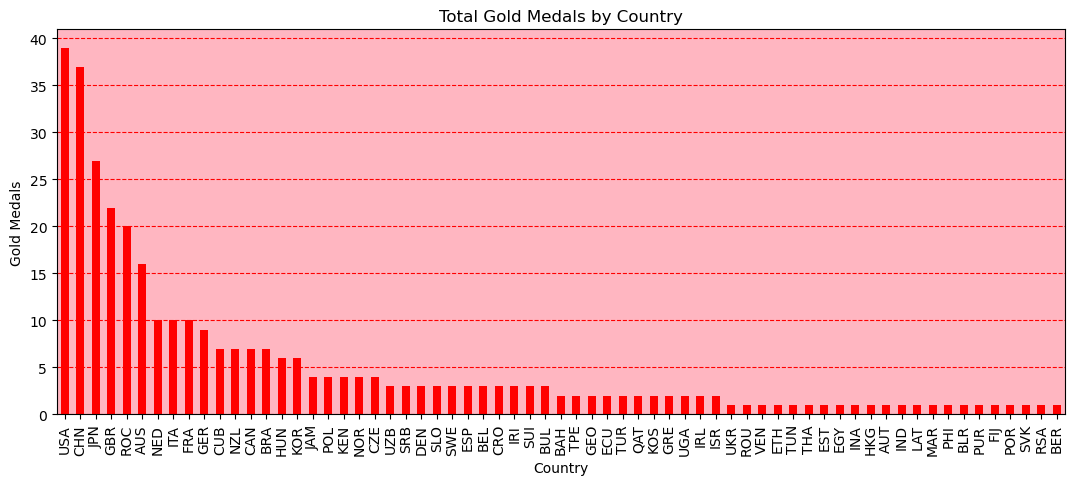

In [22]:
plt.figure(figsize=(13, 5))
total_modern_medals.plot(kind='bar', color = "red")
plt.xlabel("Country")
plt.ylabel("Gold Medals")
plt.title("Total Gold Medals by Country")
plt.grid(axis='y', linestyle='--', color = "red")

plt.gca().set_facecolor('lightpink')

Text(0.5, 1.0, 'Unique Events for Summer Olympics')

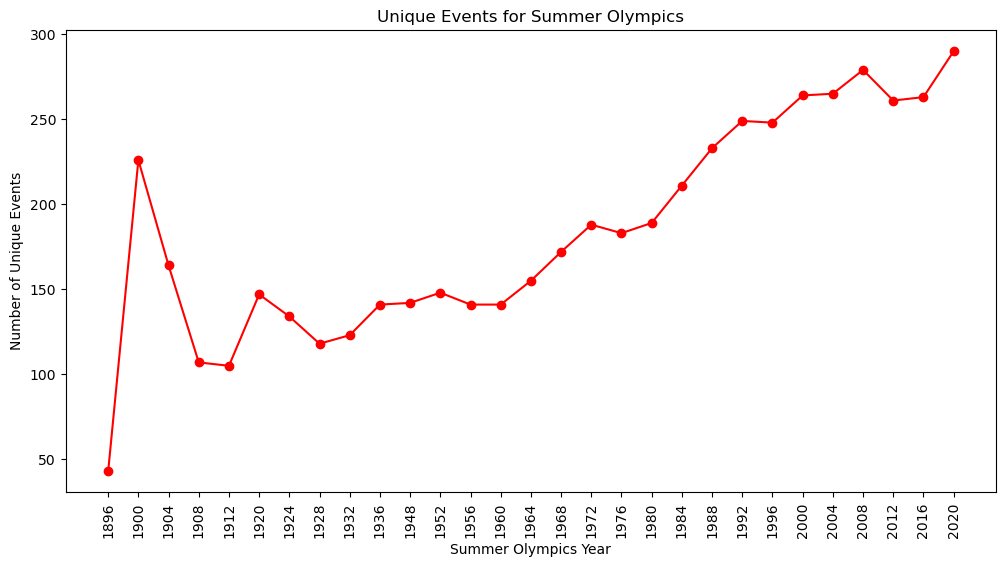

In [34]:
events_total = summer_only_df.groupby("year")["event"].nunique()
year_of_event = events_total.index
x_value = year_of_event
y_value = events_total
plt.figure(figsize=(12, 6))
plt.plot(x_value, y_value, color='red', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Summer Olympics Year')
plt.ylabel('Number of Unique Events')
plt.title('Unique Events for Summer Olympics')